# Change the directory to google drive

In [ ]:
# Change the directory to the google drive

# Must right click the shared folder and select 'Add a shortcut to Drive' before running below line
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AML Project/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1uNtjQkZqMZR1kFtEG9zBSOFmChEqoAos/AML Project


# Install and import all necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, metrics, naive_bayes, tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import tensorflow as tf
import pickle

# Data pre-processing

In [2]:
# Import data
projects_raw = pd.read_csv('./data/projects.csv')
outcomes_raw = pd.read_csv('./data/outcomes.csv')

In [3]:
# Combine the 2 data sets
df_raw = pd.merge(projects_raw, outcomes_raw, on='projectid')
pd.set_option("display.max_columns", None)
df_raw.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.710000e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,Elgin School District U-46,Du Page,f,f,f,f,f,f,Mrs.,f,f,Special Needs,Special Needs,Literacy,Literacy & Language,Other,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,f,f,t,f,t,t,t,f,80.0,0.0,6.0
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.600000e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,Idaho Falls School District 91,Bonneville,f,f,f,f,f,f,Mrs.,f,f,Mathematics,Math & Science,NaN,NaN,Supplies,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.300000e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,School Administrative Unit 10,Rockingham,f,f,f,f,f,f,Mrs.,f,f,Environmental Science,Math & Science,Applied Sciences,Math & Science,Technology,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f,f,f,t,f,f,f,f,NaN,0.0,2.0
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.100000e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,Richmond City School District,Richmond City,f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,NaN,NaN,Other,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f,f,f,t,f,f,f,f,NaN,0.0,1.0
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.710000e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,Ravenswood-ridge Elem Network,Cook,f,t,f,f,f,f,Mr.,f,f,Environmental Science,Math & Science,NaN,NaN,Supplies,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,f,f,t,t,f,f,t,f,50.0,0.0,2.0


In [4]:
print('# of rows:', len(df_raw))
print('# of cols:', len(df_raw.columns))
print('column name:', df_raw.columns)

# of rows: 619326
# of cols: 46
column name: Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_zip', 'school_metro', 'school_district', 'school_county',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise', 'teacher_prefix',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'is_exciting', 'at_least_1_teacher_referred_donor',
       'fully_funded', 'at_least_1_green_donation', 'grea

## Feature Engineering

In [5]:
# Step 1: Exclude ID related columns and other irrelevant columns
# projectid, teacher_acctid, schoolid, school_ncesid, school_latitude, school_longitude
# school_city, school_state, school_zip, school_district, school_county, school_year_round
# teacher_prefix, date_posted

df_1 = df_raw.drop(['projectid', 
                    'teacher_acctid',
                    'schoolid',
                    'school_ncesid',
                    'school_latitude',
                    'school_longitude',
                    'school_city',
                    'school_state',
                    'school_zip',
                    'school_district',
                    'school_county',
                    'school_year_round',
                    'teacher_prefix',
                    'date_posted'
                    ], axis=1)

print('# of rows:', len(df_1))
print('# of cols:', len(df_1.columns))
print('column name:', df_1.columns)

# of rows: 619326
# of cols: 32
column name: Index(['school_metro', 'school_charter', 'school_magnet', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area',
       'secondary_focus_subject', 'secondary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'great_messages_proportion',
       'teacher_referred_count', 'non_teacher_referred_count'],
   

In [6]:
# Step 2: Exclude columns with large null values
df_1.isnull().sum()

school_metro                                       75488
school_charter                                         0
school_magnet                                          0
school_nlns                                            0
school_kipp                                            0
school_charter_ready_promise                           0
teacher_teach_for_america                              0
teacher_ny_teaching_fellow                             0
primary_focus_subject                                 36
primary_focus_area                                    36
secondary_focus_subject                           193949
secondary_focus_area                              193949
resource_type                                         43
poverty_level                                          0
grade_level                                            7
fulfillment_labor_materials                        35082
total_price_excluding_optional_support                 0
total_price_including_optional_

In [7]:
# Step 2: Exclude columns with large null values:
# secondary_focus_subject, secondary_focus_area, great_messages_proportion

df_2 = df_1.drop(['secondary_focus_subject',
                  'secondary_focus_area',
                  'great_messages_proportion',
                  ], axis=1)

print('# of rows:', len(df_2))
print('# of cols:', len(df_2.columns))
print('column name:', df_2.columns)

# of rows: 619326
# of cols: 29
column name: Index(['school_metro', 'school_charter', 'school_magnet', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'teacher_referred_count',
       'non_teacher_referred_count'],
      dtype='object')


In [8]:
# Step 3: Remove rows with null values
df_3 = df_2.dropna()

print('# of rows:', len(df_3))
print('# of cols:', len(df_3.columns))
print('column name:', df_3.columns)

# of rows: 439261
# of cols: 29
column name: Index(['school_metro', 'school_charter', 'school_magnet', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
       'primary_focus_subject', 'primary_focus_area', 'resource_type',
       'poverty_level', 'grade_level', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'teacher_referred_count',
       'non_teacher_referred_count'],
      dtype='object')


In [9]:
# Step 4: One hot encoding for categorical values
df_4_temp = pd.get_dummies(df_3[['school_metro', 'primary_focus_area', 'primary_focus_subject', 'resource_type', 'poverty_level', 'grade_level']])

df_4 = pd.concat((df_3, df_4_temp), axis=1)
df_4 = df_4.drop(['school_metro', 'primary_focus_area', 'primary_focus_subject', 'resource_type', 'poverty_level', 'grade_level'], axis=1)

print('# of rows:', len(df_4))
print('# of cols:', len(df_4.columns))
print('column name:', df_4.columns)

# of rows: 439261
# of cols: 74
column name: Index(['school_charter', 'school_magnet', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'teacher_referred_count',
       'non_teacher_referred_count', 'school_metro_rural',
       'school_metro_suburban', 'school_metro_urban',
       'primary_focus_area_Applied Learning',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
    

In [10]:
# Step 5: Label encoding for true/false (categorical) values including the target column
boolean_attributes = ['school_charter','school_magnet','school_nlns','school_kipp','school_charter_ready_promise','teacher_teach_for_america','teacher_ny_teaching_fellow','eligible_double_your_impact_match',\
                      'eligible_almost_home_match','is_exciting','at_least_1_teacher_referred_donor','at_least_1_green_donation','great_chat','three_or_more_non_teacher_referred_donors',\
                      'one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor','fully_funded']

df_5 = df_4
df_5[boolean_attributes] = df_5[boolean_attributes].replace(['f', 't'], [0, 1])
print('# of rows:', len(df_5))
print('# of cols:', len(df_5.columns))
print('column name:', df_5.columns)

# of rows: 439261
# of cols: 74
column name: Index(['school_charter', 'school_magnet', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'teacher_referred_count',
       'non_teacher_referred_count', 'school_metro_rural',
       'school_metro_suburban', 'school_metro_urban',
       'primary_focus_area_Applied Learning',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
    

In [11]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439261 entries, 0 to 618817
Data columns (total 74 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   school_charter                                  439261 non-null  int64  
 1   school_magnet                                   439261 non-null  int64  
 2   school_nlns                                     439261 non-null  int64  
 3   school_kipp                                     439261 non-null  int64  
 4   school_charter_ready_promise                    439261 non-null  int64  
 5   teacher_teach_for_america                       439261 non-null  int64  
 6   teacher_ny_teaching_fellow                      439261 non-null  int64  
 7   fulfillment_labor_materials                     439261 non-null  float64
 8   total_price_excluding_optional_support          439261 non-null  float64
 9   total_price_including_opti

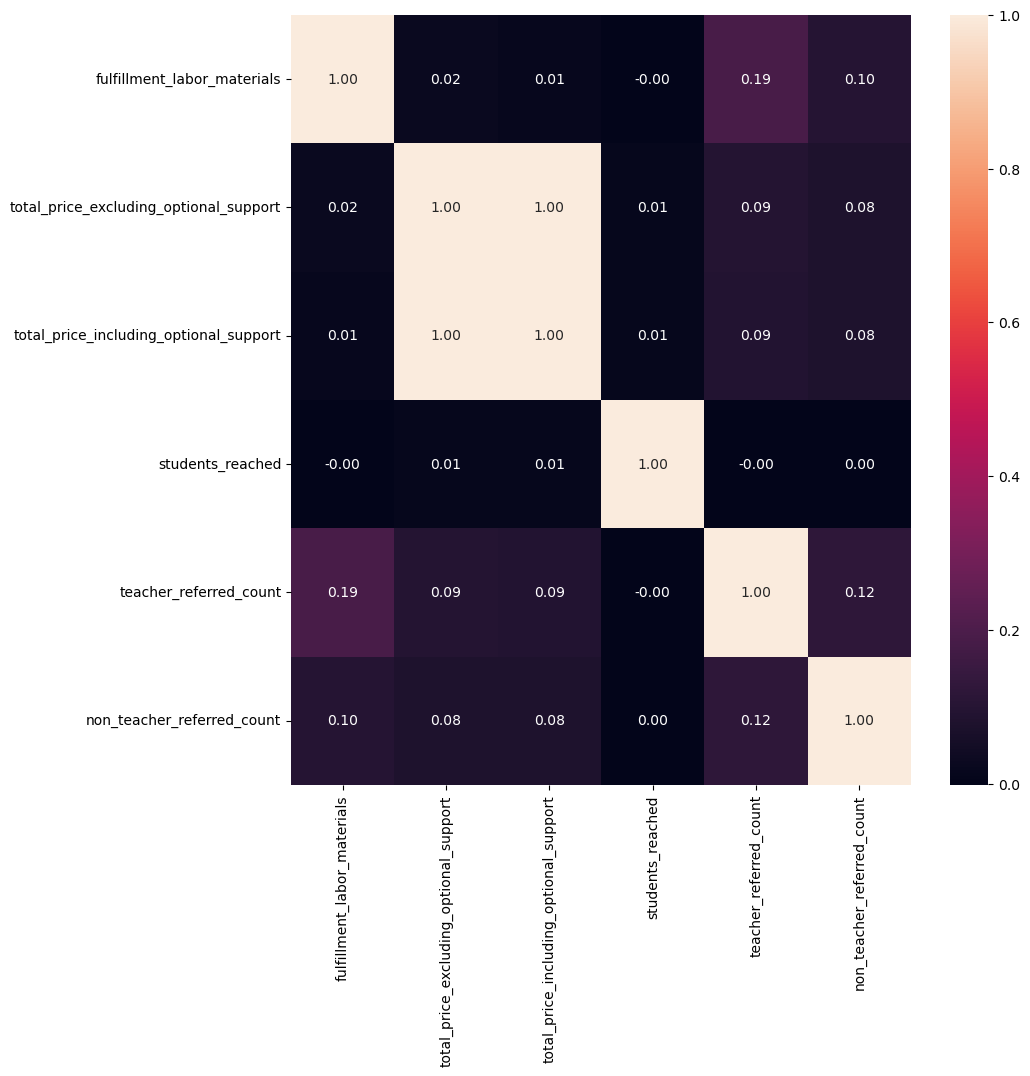

In [12]:
# Step 6: Check for correlation among numerical attributes
numerical_attributes = ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'teacher_referred_count', 'non_teacher_referred_count']
corr = df_5[numerical_attributes].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, fmt=".2f")
plt.show()

In [13]:
# is_exciting perfectly predicts fully_funded
df_5[(df_5["fully_funded"] == 0) & (df_5["is_exciting"] == 1)]

,school_charter,school_magnet,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,teacher_referred_count,non_teacher_referred_count,school_metro_rural,school_metro_suburban,school_metro_urban,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2


In [14]:
# Remove column total_price_including_optional_support which has high correlation with total_price_excluding_optional_support
# Remove column is_exciting that perfectly predicts the target output
# Remove columns that are not actionable for either donors or teachers
df_6 = df_5.drop(columns = ["total_price_including_optional_support", "great_chat", "teacher_referred_count", "non_teacher_referred_count", "is_exciting"])
print('# of rows:', len(df_6))
print('# of cols:', len(df_6.columns))
print('column name:', df_6.columns)

# of rows: 439261
# of cols: 69
column name: Index(['school_charter', 'school_magnet', 'school_nlns', 'school_kipp',
       'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation',
       'three_or_more_non_teacher_referred_donors',
       'one_non_teacher_referred_donor_giving_100_plus',
       'donation_from_thoughtful_donor', 'school_metro_rural',
       'school_metro_suburban', 'school_metro_urban',
       'primary_focus_area_Applied Learning',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
      

In [ ]:
df_6.head()

,school_charter,school_magnet,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,school_metro_rural,school_metro_suburban,school_metro_urban,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_subject_Applied Sciences,primary_focus_subject_Character Education,primary_focus_subject_Civics & Government,primary_focus_subject_College & Career Prep,primary_focus_subject_Community Service,primary_focus_subject_ESL,primary_focus_subject_Early Development,primary_focus_subject_Economics,primary_focus_subject_Environmental Science,primary_focus_subject_Extracurricular,primary_focus_subject_Foreign Languages,primary_focus_subject_Gym & Fitness,primary_focus_subject_Health & Life Science,primary_focus_subject_Health & Wellness,primary_focus_subject_History & Geography,primary_focus_subject_Literacy,primary_focus_subject_Literature & Writing,primary_focus_subject_Mathematics,primary_focus_subject_Music,primary_focus_subject_Nutrition,primary_focus_subject_Other,primary_focus_subject_Parent Involvement,primary_focus_subject_Performing Arts,primary_focus_subject_Social Sciences,primary_focus_subject_Special Needs,primary_focus_subject_Sports,primary_focus_subject_Visual Arts,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2
0,0,0,0,0,0,0,0,30.0,444.36,7.0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,30.0,285.09,230.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,30.0,232.94,18.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,30.0,513.41,70.0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,30.0,688.11,22.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
len(df_6[df_6['fully_funded']==1])/len(df_6)

0.8185497915817703

In [15]:
# Split the data set into training set(64%), validation set (16%) and test set (20%)
x_rem, x_test, y_rem, y_test = model_selection.train_test_split(df_6.drop(['fully_funded'], axis=1), df_6['fully_funded'], train_size = 0.8, random_state = 2022)
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_rem, y_rem, train_size = 0.8, random_state = 2022)

print('rows of x_train', len(x_train))
print('rows of x_valid', len(x_valid))
print('rows of x_test', len(x_test))
print('total rows of x:', len(x_train) + len(x_valid) + len(x_test))

print('rows of y_train', len(y_train))
print('rows of y_valid', len(y_valid))
print('rows of y_test', len(y_test))
print('total rows of y:', len(y_train) + len(y_valid) + len(y_test))

rows of x_train 281126
rows of x_valid 70282
rows of x_test 87853
total rows of x: 439261
rows of y_train 281126
rows of y_valid 70282
rows of y_test 87853
total rows of y: 439261


# EDA

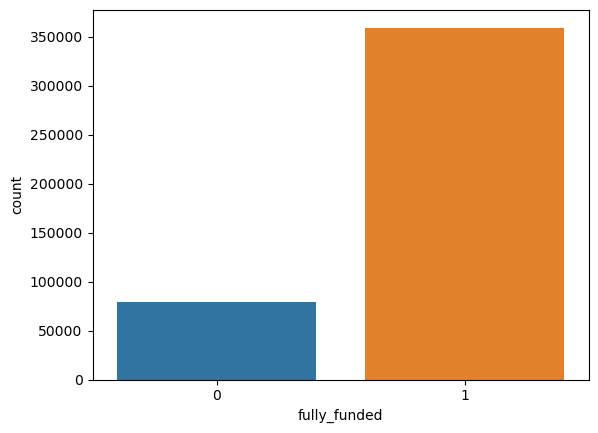

In [17]:
sns.countplot(data=df_6, x='fully_funded')
plt.show()

In [18]:
feature_list = df_3.columns.to_list()
exclude = ['fully_funded', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'students_reached',
           "total_price_including_optional_support", "great_chat", "teacher_referred_count", 
           "non_teacher_referred_count", "is_exciting",  "primary_focus_subject",]
feature_list = [i for i in feature_list if i not in exclude]

In [19]:
boolean_attributes = ['school_charter','school_magnet','school_nlns','school_kipp','school_charter_ready_promise','teacher_teach_for_america','teacher_ny_teaching_fellow','eligible_double_your_impact_match',\
                      'eligible_almost_home_match','is_exciting','at_least_1_teacher_referred_donor','at_least_1_green_donation','great_chat','three_or_more_non_teacher_referred_donors',\
                      'one_non_teacher_referred_donor_giving_100_plus','donation_from_thoughtful_donor','fully_funded']

temp_df = df_3.copy()
temp_df[boolean_attributes] = temp_df[boolean_attributes].replace(['f', 't'], ['0', '1'])

In [20]:
temp_df ['school_charter'].dtype

dtype('O')

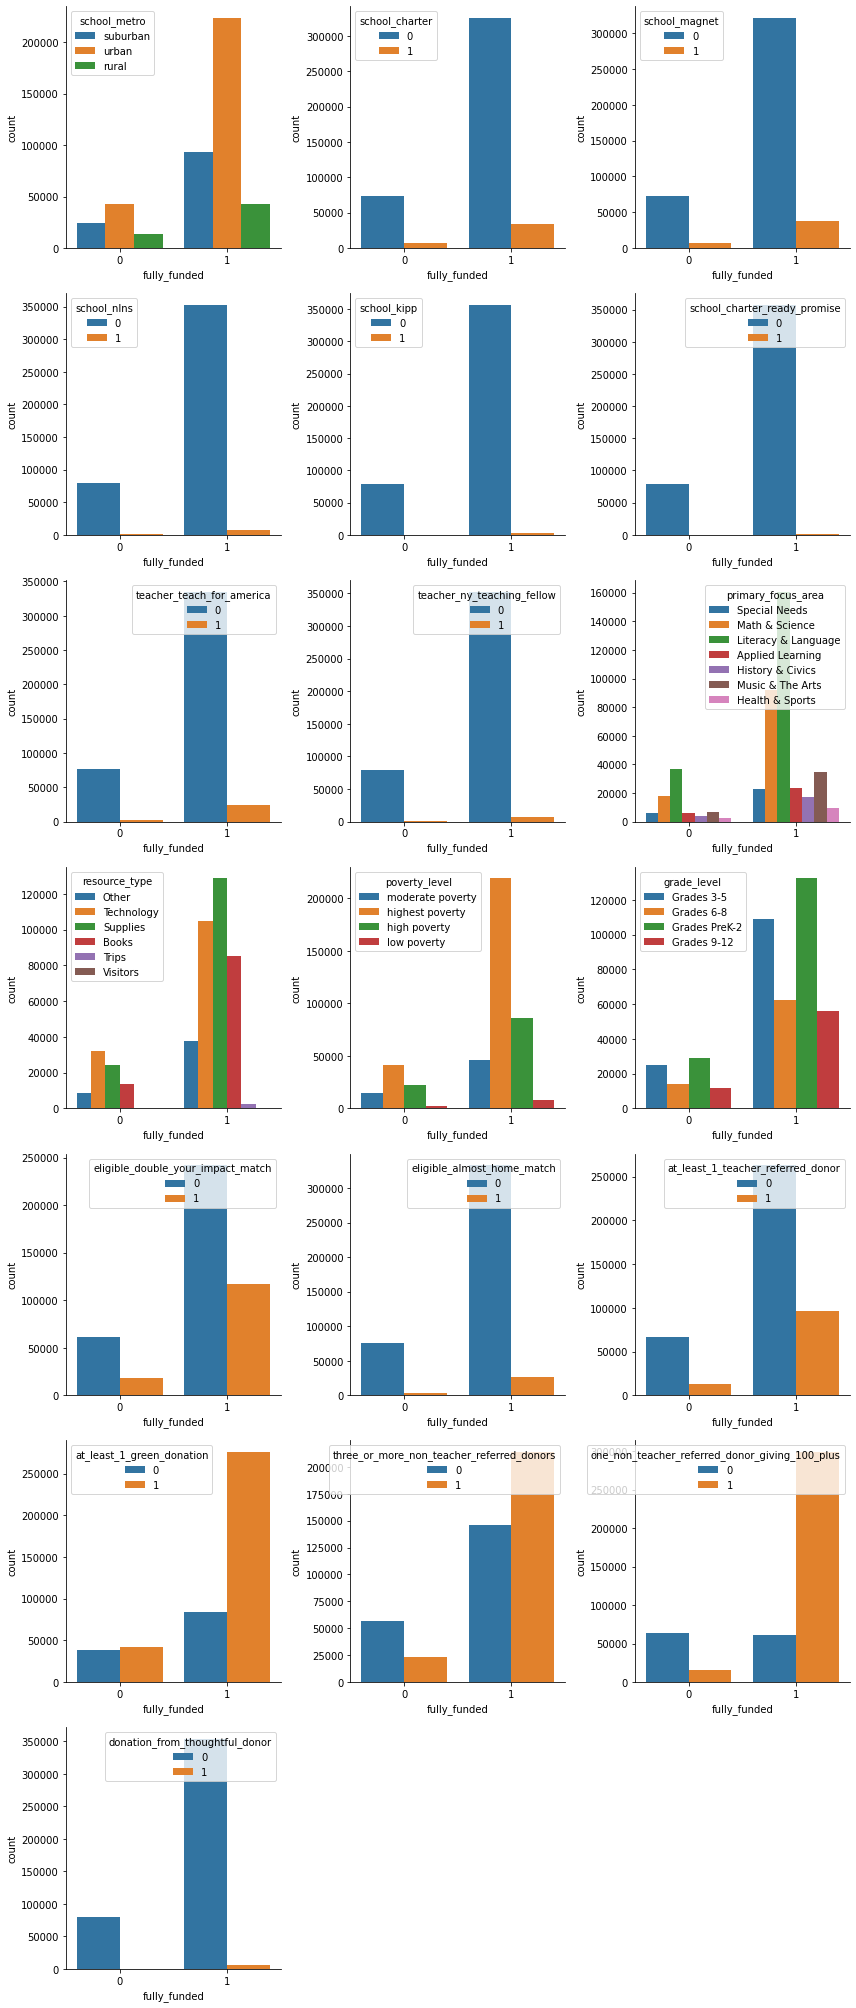

In [ ]:
g = sns.FacetGrid(pd.DataFrame(feature_list), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, feature_list):
    sns.countplot(data=temp_df, x='fully_funded', hue=x_var, ax=ax)
g.tight_layout()

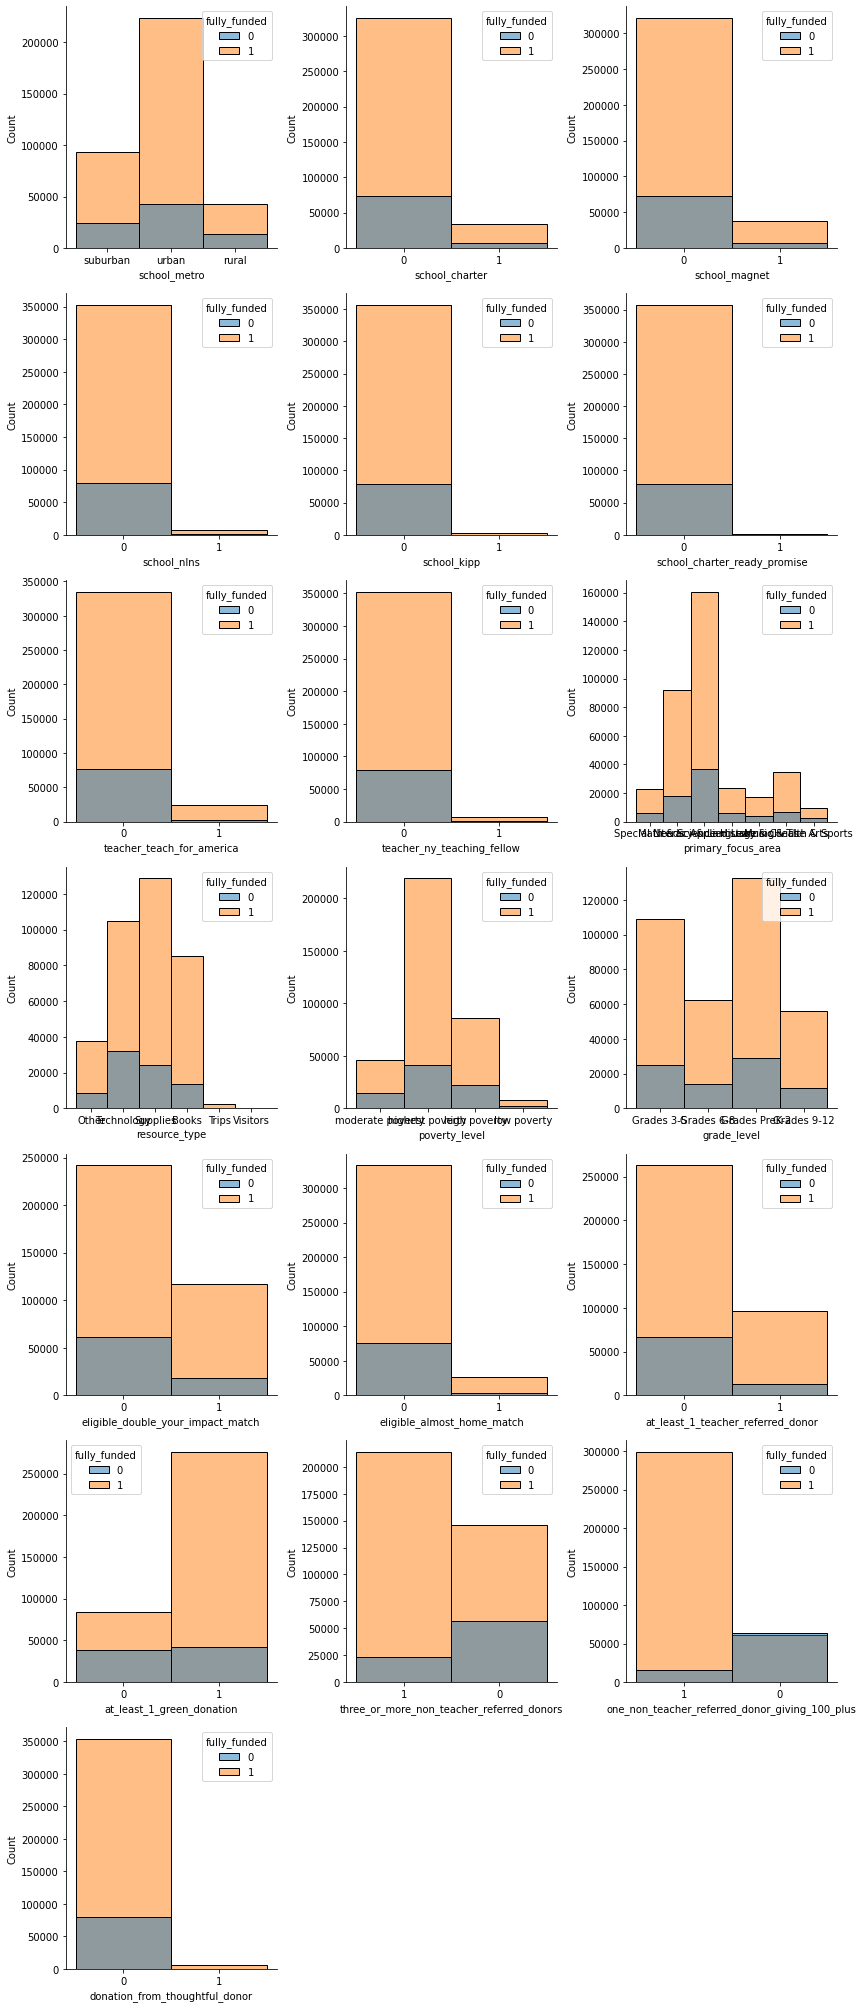

In [ ]:
g = sns.FacetGrid(pd.DataFrame(feature_list), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, feature_list):
    sns.histplot(data=temp_df, x=x_var, hue='fully_funded', hue_order=["0","1"], ax=ax)

g.tight_layout()

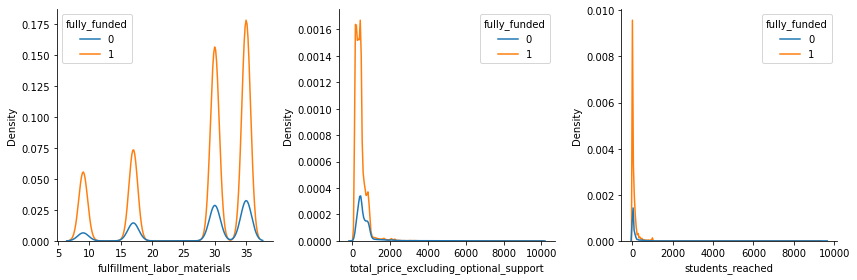

In [ ]:
cont_feature_list = ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 'students_reached']

g = sns.FacetGrid(pd.DataFrame(cont_feature_list), col=0, col_wrap=3, sharex=False, sharey=False, height=4)
for ax, x_var in zip(g.axes, cont_feature_list):
    if x_var == 'total_price_excluding_optional_support':
      sns.kdeplot(data=temp_df[temp_df['total_price_excluding_optional_support'] < 10000], x=x_var, hue='fully_funded', hue_order=["0","1"], ax=ax)
    elif x_var == 'students_reached':
      sns.kdeplot(data=temp_df[temp_df['students_reached'] < 10000], x=x_var, hue='fully_funded', hue_order=["0","1"], ax=ax)
    else:
      sns.kdeplot(data=temp_df, x=x_var, hue='fully_funded', hue_order=["0","1"], ax=ax)

g.tight_layout()

In [ ]:
temp_df[temp_df['fully_funded']=='0']['total_price_excluding_optional_support'].max()

73549.87

# 'Model' object to store model performance

In [ ]:
class Model:
    # instance attributes
    def __init__(self, name, x_test, actual, prediction, prediction_probability, top_features=[]):
        self.name = name
        self.x_test = x_test
        self.actual = actual
        self.prediction = prediction
        self.prediction_probability = prediction_probability
        self.accuracy = metrics.accuracy_score(actual, prediction)
        self.precision = metrics.precision_score(actual, prediction)
        self.recall = metrics.recall_score(actual, prediction)
        self.f1_score = metrics.f1_score(actual, prediction)
        self.auc = metrics.roc_auc_score(actual, prediction_probability)
        self.confusion_matrix = metrics.confusion_matrix(actual, prediction)
        self.fpr, self.tpr, self.thresholds = metrics.roc_curve(actual, prediction_probability)
        self.top_features = top_features

    # instance method
    def getName(self):
      return self.name

    def getX(self):
      return self.x_test
    
    def getPrediction(self):
      return self.prediction

    def getPredictionProbability(self):
      return self.prediction_probability
    
    def getAccuracy(self):
      return self.accuracy
    
    def getPrecision(self):
      return self.precision
    
    def getRecall(self):
      return self.recall
    
    def getF1_score(self):
      return self.f1_score

    def getAUC(self):
      return self.auc
    
    def getFPR(self):
      return self.fpr

    def getTPR(self):
      return self.tpr
    
    def getThresholds(self):
      return self.thresholds
    
    def getTopFeatures(self, n, print_results=False):
      if print_results:
        print(self.name)
      return self.top_features[:n]

    def getMetricsSummary(self):
      print('Accuracy: %.3f' % self.accuracy)
      print('Precision: %.3f' % self.precision)
      print('Recall: %.3f' % self.recall)
      print('F1 Score: %.3f' % self.f1_score)
      print('AUC: %.3f'% self.auc)
      print('\n')

    def getConfusionMatrix(self):
      print('Confusion Matrix: ')
      plt.figure(figsize = (5, 5))
      c_matrix = sns.heatmap(self.confusion_matrix, annot = True, fmt="d")
      c_matrix.set_xlabel("Predicted")
      c_matrix.set_ylabel("True")
      plt.show()
      print('\n')
    
    def getROCAUCCurve(self):
      plt.plot([0, 1], [0, 1], ls = '--')
      plt.plot(self.fpr, self.tpr, marker = '.', label = self.name)
      plt.xlabel('FPR')
      plt.ylabel('TPR')
      plt.title('ROC Curve')
      plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
      plt.show()

    def getSummary(self, n=None):
      print(self.name, '\n')
      self.getMetricsSummary()
      self.getConfusionMatrix()
      self.getROCAUCCurve()

    def getConfusedProjects(self, label, n):
      filtered = [i for i in zip(self.x_test.to_numpy(), self.actual, self.prediction, self.prediction_probability) if i[1]==label and i[2]!=label]
      filtered_sort = sorted(filtered, key=lambda x:x[3], reverse=1-label)[:n]
      print("Misclassied True " + str(label))
      return pd.DataFrame([i[0] for i in filtered_sort], columns=x_test.columns)

In [ ]:
def evaluateModels(*models: Model):
    # Tabulate Model Performance
    print("{:<25} {:<12} {:<12} {:<12} {:<12} {:<12}".format('Model Name', 'Accuracy', 'Precision' ,'Recall', 'F1 Score', 'AUC'))
    for model in models:
      print("{:<25} {:<12} {:<12} {:<12} {:<12} {:<12}".format(model.getName(), 
                                                               round(model.getAccuracy(),2), 
                                                               round(model.getPrecision(),2), 
                                                               round(model.getRecall(),2), 
                                                               round(model.getF1_score(),2), 
                                                               round(model.getAUC(),2)))

    # Plot AUC-ROC
    plt.plot([0, 1], [0, 1], ls = '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    
    for model in models: 
      plt.plot(model.getFPR(), model.getTPR(), marker = '.', label = model.getName())
    
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

# Model 1: Naive Bayes

In [ ]:
nb_cls = naive_bayes.BernoulliNB()
nb_cls.fit(x_rem,y_rem)

BernoulliNB()

In [ ]:
# Save the model to disk
filename = './model/nb.sav'
pickle.dump(nb_cls, open(filename, 'wb'))

In [ ]:
# Directly retrieve model

In [ ]:
# Load the model from disk
filename = './model/nb.sav'
nb_cls = pickle.load(open(filename, 'rb'))

In [ ]:
y_nb_pred = nb_cls.predict(x_test)
y_nb_pred_rem = nb_cls.predict(x_rem)
y_nb_rem_prob = nb_cls.predict_proba(x_rem)
y_nb_rem_prob = y_nb_rem_prob[:, 1]
y_nb_pred_prob = nb_cls.predict_proba(x_test)
y_nb_pred_prob = y_nb_pred_prob[:, 1]

In [ ]:
nb_top_features = np.array(sorted([i for i in zip(nb_cls.feature_log_prob_[1] - nb_cls.feature_log_prob_[0], nb_cls.feature_names_in_)], key= lambda x: x[0], reverse=True))[:,1]

Naive Bayes 

Accuracy: 0.884
Precision: 0.909
Recall: 0.953
F1 Score: 0.931
AUC: 0.873


Confusion Matrix: 


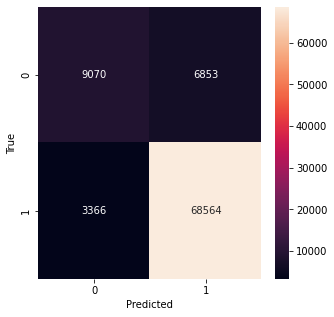

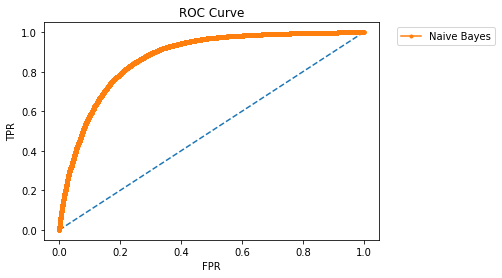

In [ ]:
model_nb = Model('Naive Bayes', x_test, y_test, y_nb_pred, y_nb_pred_prob, nb_top_features)
model_nb.getSummary()

# Model 2: Decision Tree

In [ ]:
# Avoid running! Takes too long
# parameters = [{'criterion': ['gini', 'entropy'], 
#               'splitter': ['best', 'random'], 
#               'max_depth': np.arange(2,14,1), 
#               'min_samples_split': [3, 5, 7, 9]}]


parameters = [{'criterion': ['entropy'], 
               'splitter': ['best'], 
               'max_depth': [10], 
               'min_samples_split': [7]}]

dt_cls = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parameters)
dt_cls.fit(x_rem,y_rem)
print('best score:', dt_cls.best_score_)
print('best parameters: ', dt_cls.best_params_)

best score: 0.9284990663413211
best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 7, 'splitter': 'best'}


In [ ]:
# Save the model to disk
filename = './model/dt.sav'
pickle.dump(dt_cls, open(filename, 'wb'))

In [ ]:
# Directly retrieve model

In [ ]:
# Load the model from disk
filename = './model/dt.sav'
dt_cls = pickle.load(open(filename, 'rb'))

In [ ]:
y_dt_pred = dt_cls.predict(x_test)
y_dt_pred_rem = dt_cls.predict(x_rem)

y_dt_rem_prob = dt_cls.predict_proba(x_rem) 
y_dt_rem_prob = y_dt_rem_prob[:, 1]
y_dt_pred_prob = dt_cls.predict_proba(x_test)
y_dt_pred_prob = y_dt_pred_prob[:, 1]

In [ ]:
dt_top_features = np.array(sorted([i for i in zip(dt_cls.best_estimator_.feature_importances_, dt_cls.best_estimator_.feature_names_in_)], key= lambda x: x[0], reverse=True))[:,1]

Decision Tree 

Accuracy: 0.928
Precision: 0.936
Recall: 0.979
F1 Score: 0.957
AUC: 0.941


Confusion Matrix: 


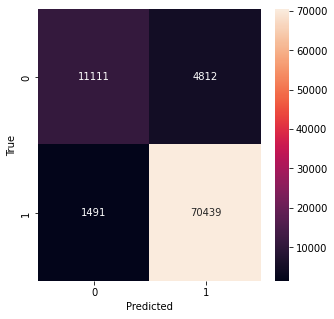

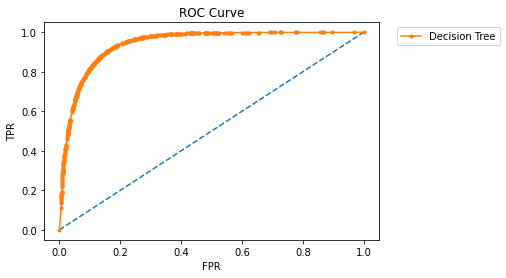

In [ ]:
model_dt = Model('Decision Tree', x_test, y_test, y_dt_pred, y_dt_pred_prob, dt_top_features)
model_dt.getSummary()

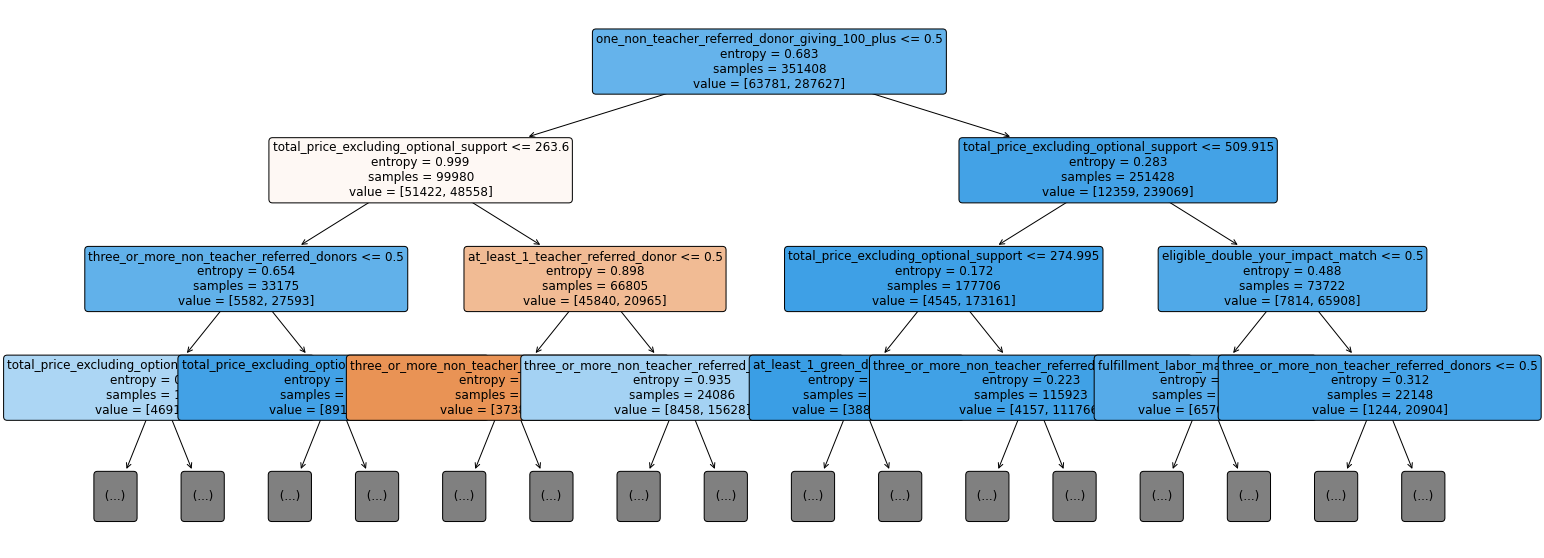

In [ ]:
plt.figure(figsize=(25,10))
tree.plot_tree(dt_cls.best_estimator_,
              feature_names=x_rem.columns,
              max_depth=3,
              filled=True, 
              rounded=True, 
              fontsize=12)
plt.show()

# Model 3: Logistic Regression

In [ ]:
# Train and tune model

In [ ]:
parameters = [{'C': [1, 10, 100]}]

lr_cls = model_selection.GridSearchCV(linear_model.LogisticRegression(solver='newton-cg', max_iter=1000, random_state=2022), parameters)
lr_cls.fit(x_rem,y_rem)
print('best score:', lr_cls.best_score_)
print('best parameters: ', lr_cls.best_params_)

In [ ]:
# Save the model to disk
filename = './model/lr.sav'
pickle.dump(lr_cls, open(filename, 'wb'))

In [ ]:
# Directly retrieve model

In [ ]:
# Load the model from disk
filename = './model/lr.sav'
lr_cls = pickle.load(open(filename, 'rb'))

In [ ]:
y_lr_pred = lr_cls.predict(x_test)

y_lr_pred_prob = lr_cls.predict_proba(x_test)
y_lr_pred_prob = y_lr_pred_prob[:, 1]

In [ ]:
lr_top_features = np.array(sorted([i for i in zip(lr_cls.best_estimator_.coef_[0], lr_cls.best_estimator_.feature_names_in_)], key= lambda x: x[0], reverse=True))[:,1]


Logistic Regression 

Accuracy: 0.909
Precision: 0.924
Recall: 0.968
F1 Score: 0.946
AUC: 0.901


Confusion Matrix: 


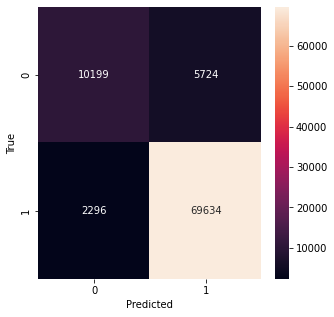

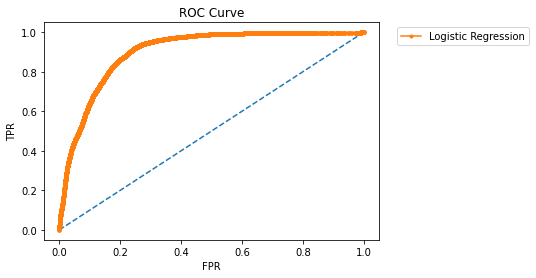

In [ ]:
model_lr = Model("Logistic Regression", x_test, y_test, y_lr_pred, y_lr_pred_prob, lr_top_features)
model_lr.getSummary()

# Model 4: Neural Networks

In [ ]:
nn_model = tf.keras.models.Sequential()

# Input Layer and First Hidden Layer
nn_model.add(tf.keras.layers.Dense(128, input_dim = len(x_train.columns), activation = 'relu'))
nn_model.add(tf.keras.layers.BatchNormalization())

nn_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
nn_model.add(tf.keras.layers.Dropout(0.2))

nn_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
nn_model.add(tf.keras.layers.Dropout(0.2))


# Output Layer
nn_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               8832      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
# Compile the model
nn_model.compile(loss=tf.keras.losses.binary_crossentropy, 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                 metrics=['accuracy'])

# Train the model
epochs = 20
nn_model_run = nn_model.fit(x_train.to_numpy().astype('float'), 
                            y_train.to_numpy().astype('float').reshape((-1,1)), 
                            epochs=epochs, 
                            verbose=1,
                            callbacks = tf.keras.callbacks.EarlyStopping(
                                monitor = 'val_accuracy',
                                min_delta = 0,
                                patience = 4,
                                mode = 'max',
                                restore_best_weights = True
                            ),
                            validation_data=(x_valid.to_numpy().astype('float'), 
                                             y_valid.to_numpy().astype('float').reshape((-1,1))))

Epoch 1/20
8786/8786 [==============================] - 28s 3ms/step - loss: 0.2763 - accuracy: 0.8937 - val_loss: 0.3742 - val_accuracy: 0.9175
Epoch 2/20
8786/8786 [==============================] - 25s 3ms/step - loss: 0.2316 - accuracy: 0.9151 - val_loss: 0.3022 - val_accuracy: 0.9208
Epoch 3/20
8786/8786 [==============================] - 28s 3ms/step - loss: 0.2220 - accuracy: 0.9195 - val_loss: 0.2596 - val_accuracy: 0.9174
Epoch 4/20
8786/8786 [==============================] - 27s 3ms/step - loss: 0.2189 - accuracy: 0.9209 - val_loss: 0.2284 - val_accuracy: 0.9155
Epoch 5/20
8786/8786 [==============================] - 28s 3ms/step - loss: 0.2184 - accuracy: 0.9213 - val_loss: 0.2204 - val_accuracy: 0.9260
Epoch 6/20
8786/8786 [==============================] - 28s 3ms/step - loss: 0.2162 - accuracy: 0.9222 - val_loss: 0.3126 - val_accuracy: 0.9244
Epoch 7/20
8786/8786 [==============================] - 25s 3ms/step - loss: 0.2167 - accuracy: 0.9226 - val_loss: 0.2192 - val_ac

In [ ]:
nn_model.save('./model/nn_model.h5')
filename = './model/nn_model_run_history.sav'
pickle.dump(nn_model_run.history, open(filename, 'wb'))

In [ ]:
nn_model = tf.keras.models.load_model('./model/nn_model.h5')
filename = './model/nn_model_run_history.sav'
nn_model_run = pickle.load(open(filename, 'rb'))

In [ ]:
y_nn_pred_prob = nn_model.predict(x_test).squeeze(axis=1)
decision_threshold = 0.5
y_nn_pred = [1 if i >= decision_threshold else 0 for i in y_nn_pred_prob]

Neural Network 

Accuracy: 0.925
Precision: 0.936
Recall: 0.976
F1 Score: 0.955
AUC: 0.939


Confusion Matrix: 


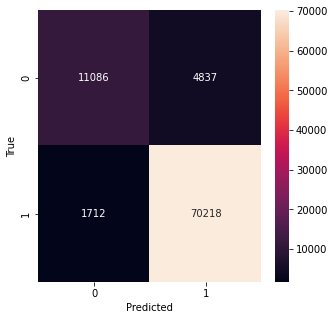

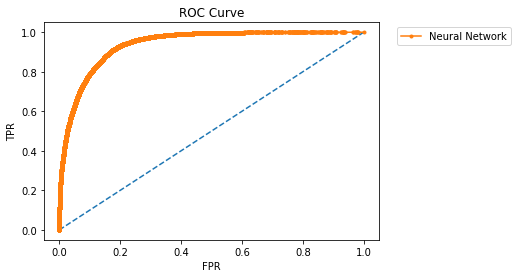

In [ ]:
model_nn = Model('Neural Network', x_test, y_test, y_nn_pred, y_nn_pred_prob)
model_nn.getSummary()

# Model Evaluation

In [ ]:
# Create table with consolidated Accuracy, Precision, Recall, F1 score and AUC

In [ ]:
# Plot graphs of different AUCs

Model Name                Accuracy     Precision    Recall       F1 Score     AUC         
Naive Bayes               0.88         0.91         0.95         0.93         0.87        
Decision Tree             0.93         0.94         0.98         0.96         0.94        
Logistic Regression       0.91         0.92         0.97         0.95         0.9         
Neural Network            0.93         0.94         0.98         0.96         0.94        


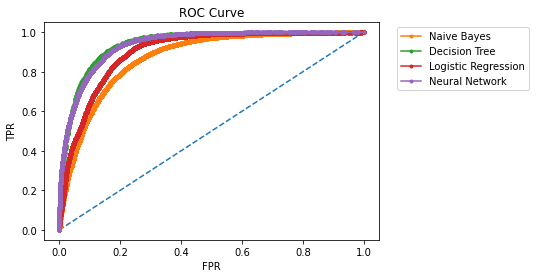

In [ ]:
evaluateModels(model_nb, model_dt, model_lr, model_nn)

In [ ]:
# Assess misclassification of models

## Top Features

In [ ]:
n_features = 10
nb_top_10_features = model_nb.getTopFeatures(n_features, True)
print(nb_top_10_features)
dt_top_10_features = model_dt.getTopFeatures(n_features, True)
print(dt_top_10_features)
lr_top_10_features = model_lr.getTopFeatures(n_features, True)
print(lr_top_10_features)
nn_top_10_features = ['one_non_teacher_referred_donor_giving_100_plus', 'total_price_excluding_optional_support', 'three_or_more_non_teacher_referred_donors',
                      'at_least_1_teacher_referred_donor', 'at_least_1_green_donation', 'fulfillment_labor_materials', 'school_metro_urban',
                      'poverty_level_highest poverty', 'primary_focus_area_Math & Science', 'resource_type_Books']
print('Neural Network', '\n', nn_top_10_features)

Naive Bayes
['one_non_teacher_referred_donor_giving_100_plus'
 'donation_from_thoughtful_donor'
 'three_or_more_non_teacher_referred_donors' 'teacher_teach_for_america'
 'teacher_ny_teaching_fellow' 'at_least_1_teacher_referred_donor'
 'school_nlns' 'eligible_almost_home_match'
 'primary_focus_subject_Economics'
 'primary_focus_subject_Environmental Science']
Decision Tree
['one_non_teacher_referred_donor_giving_100_plus'
 'total_price_excluding_optional_support'
 'at_least_1_teacher_referred_donor'
 'three_or_more_non_teacher_referred_donors' 'fulfillment_labor_materials'
 'at_least_1_green_donation' 'eligible_double_your_impact_match'
 'poverty_level_highest poverty' 'eligible_almost_home_match'
 'students_reached']
Logistic Regression
['one_non_teacher_referred_donor_giving_100_plus' 'resource_type_Trips'
 'at_least_1_teacher_referred_donor'
 'three_or_more_non_teacher_referred_donors'
 'donation_from_thoughtful_donor' 'school_charter_ready_promise'
 'at_least_1_green_donation' 'tea

In [ ]:
# Common top features for all 3 models
common_all = set.intersection(set(nb_top_10_features), set(dt_top_10_features), set(lr_top_10_features), set(nn_top_10_features))
print("Common for all 3")
common_all

Common for all 3


{'at_least_1_teacher_referred_donor',
 'one_non_teacher_referred_donor_giving_100_plus',
 'three_or_more_non_teacher_referred_donors'}

In [ ]:
# NB features
nb_unique = set(nb_top_10_features) - set(dt_top_10_features) - set(lr_top_10_features) - set(nn_top_10_features)
print("Unique for NB")
print(nb_unique)
print("Others for NB")
set(nb_top_10_features) - common_all - nb_unique

Unique for NB
{'primary_focus_subject_Environmental Science', 'primary_focus_subject_Economics'}
Others for NB


{'donation_from_thoughtful_donor',
 'eligible_almost_home_match',
 'school_nlns',
 'teacher_ny_teaching_fellow',
 'teacher_teach_for_america'}

In [ ]:
# DT unique features
dt_unique = set(dt_top_10_features) - set(nb_top_10_features) - set(lr_top_10_features) - set(nn_top_10_features)
print("Unique for DT")
print(dt_unique)
print("Others for DT")
set(dt_top_10_features) - common_all - dt_unique

Unique for DT
{'eligible_double_your_impact_match', 'students_reached'}
Others for DT


{'at_least_1_green_donation',
 'eligible_almost_home_match',
 'fulfillment_labor_materials',
 'poverty_level_highest poverty',
 'total_price_excluding_optional_support'}

In [ ]:
# LR unique features
lr_unique = set(lr_top_10_features) - set(dt_top_10_features) - set(nb_top_10_features) - set(nn_top_10_features)
print("Unique for LR")
print(lr_unique)
print("Others for LR")
set(lr_top_10_features) - common_all - lr_unique

Unique for LR
{'resource_type_Trips', 'school_charter_ready_promise'}
Others for LR


{'at_least_1_green_donation',
 'donation_from_thoughtful_donor',
 'school_nlns',
 'teacher_ny_teaching_fellow',
 'teacher_teach_for_america'}

In [ ]:
# NN unique features
nn_unique = set(nn_top_10_features) - set(dt_top_10_features) - set(nb_top_10_features) - set(lr_top_10_features)
print("Unique for NN")
print(nn_unique)
print("Others for NN")
set(nn_top_10_features) - common_all - nn_unique

Unique for NN
{'resource_type_Books', 'primary_focus_area_Math & Science', 'school_metro_urban'}
Others for NN


{'at_least_1_green_donation',
 'fulfillment_labor_materials',
 'poverty_level_highest poverty',
 'total_price_excluding_optional_support'}

## Misclassification

In [ ]:
# Naive Bayes - False Positives
misclassified_projects = model_nb.getConfusedProjects(0, 3)
misclassified_projects[model_nb.getTopFeatures(n_features)]

Misclassied True 0


,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,three_or_more_non_teacher_referred_donors,teacher_teach_for_america,teacher_ny_teaching_fellow,at_least_1_teacher_referred_donor,school_nlns,eligible_almost_home_match,primary_focus_subject_Economics,primary_focus_subject_Environmental Science
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Naive Bayes - False Negatives
misclassified_projects = model_nb.getConfusedProjects(1, 3)
misclassified_projects[model_nb.getTopFeatures(n_features)]

Misclassied True 1


,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,three_or_more_non_teacher_referred_donors,teacher_teach_for_america,teacher_ny_teaching_fellow,at_least_1_teacher_referred_donor,school_nlns,eligible_almost_home_match,primary_focus_subject_Economics,primary_focus_subject_Environmental Science
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Decision Tree - False Positives
misclassified_projects = model_dt.getConfusedProjects(0, 3)
misclassified_projects[model_dt.getTopFeatures(n_features)]

Misclassied True 0


,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,at_least_1_teacher_referred_donor,three_or_more_non_teacher_referred_donors,fulfillment_labor_materials,at_least_1_green_donation,eligible_double_your_impact_match,poverty_level_highest poverty,eligible_almost_home_match,students_reached
0,1.0,367.92,0.0,1.0,35.0,0.0,1.0,1.0,0.0,150.0
1,0.0,141.47,0.0,0.0,35.0,0.0,1.0,1.0,0.0,150.0
2,1.0,853.19,0.0,0.0,9.0,0.0,0.0,1.0,0.0,250.0


In [ ]:
# Decision Tree - False Negatives
misclassified_projects = model_dt.getConfusedProjects(1, 3)
misclassified_projects[model_dt.getTopFeatures(n_features)]

Misclassied True 1


,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,at_least_1_teacher_referred_donor,three_or_more_non_teacher_referred_donors,fulfillment_labor_materials,at_least_1_green_donation,eligible_double_your_impact_match,poverty_level_highest poverty,eligible_almost_home_match,students_reached
0,0.0,187.77,0.0,0.0,35.0,0.0,1.0,0.0,0.0,21.0
1,1.0,510.00,0.0,0.0,9.0,0.0,0.0,0.0,0.0,23.0
2,1.0,788.31,1.0,0.0,35.0,0.0,1.0,0.0,0.0,20.0


In [ ]:
# Logistic Regression - False Positives
misclassified_projects = model_lr.getConfusedProjects(0, 3)
misclassified_projects[model_lr.getTopFeatures(n_features)]

Misclassied True 0


,one_non_teacher_referred_donor_giving_100_plus,resource_type_Trips,at_least_1_teacher_referred_donor,three_or_more_non_teacher_referred_donors,donation_from_thoughtful_donor,school_charter_ready_promise,at_least_1_green_donation,teacher_ny_teaching_fellow,teacher_teach_for_america,school_nlns
0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
# Logistic Regression - False Negatives
misclassified_projects = model_lr.getConfusedProjects(1, 3)
misclassified_projects[model_lr.getTopFeatures(n_features)]

Misclassied True 1


,one_non_teacher_referred_donor_giving_100_plus,resource_type_Trips,at_least_1_teacher_referred_donor,three_or_more_non_teacher_referred_donors,donation_from_thoughtful_donor,school_charter_ready_promise,at_least_1_green_donation,teacher_ny_teaching_fellow,teacher_teach_for_america,school_nlns
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Neural Network - False Positives -- NN has no top feature list
misclassified_projects = model_nn.getConfusedProjects(0, 3)
misclassified_projects[nn_top_10_features]

Misclassied True 0


,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,three_or_more_non_teacher_referred_donors,at_least_1_teacher_referred_donor,at_least_1_green_donation,fulfillment_labor_materials,school_metro_urban,poverty_level_highest poverty,primary_focus_area_Math & Science,resource_type_Books
0,0.0,2259.00,0.0,0.0,1.0,17.0,1.0,0.0,0.0,1.0
1,1.0,177.31,1.0,0.0,1.0,9.0,1.0,0.0,0.0,1.0
2,1.0,178.94,1.0,0.0,1.0,35.0,1.0,1.0,0.0,0.0


In [ ]:
# Neural Network - False Negatives
misclassified_projects = model_nn.getConfusedProjects(1, 3)
misclassified_projects[nn_top_10_features]

Misclassied True 1


,one_non_teacher_referred_donor_giving_100_plus,total_price_excluding_optional_support,three_or_more_non_teacher_referred_donors,at_least_1_teacher_referred_donor,at_least_1_green_donation,fulfillment_labor_materials,school_metro_urban,poverty_level_highest poverty,primary_focus_area_Math & Science,resource_type_Books
0,0.0,393.11,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0
1,0.0,625.52,0.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0
2,0.0,265.00,0.0,0.0,0.0,17.0,1.0,1.0,0.0,0.0
